In [196]:
# The first subset is known as the training data - it’s a portion of our actual dataset that is fed into the machine learning model to discover and learn patterns. In this way, it trains our model. 

# Once your machine learning model is built (with your training data), you need unseen data to test your model. This data is called testing data, and you can use it to evaluate the performance and progress of your algorithms’ training and adjust or optimize it for improved results. 
# Testing data has two main criteria. It should:
# -Represent the actual dataset 
# -Be large enough to generate meaningful predictions


import pandas as pd
# Pandas is an open-source Python package used for data analysis and manipulation tasks. It is built on top of Numpy, which provides support for multi-dimensional arrays.

housing=pd.read_csv("./data.csv")
# housing.head() # this will display the first 5 rows of the data in table format
# housing.info() # this will give the information about the data such as total number of entries

# housing['CHAS'].value_counts() # will give the count of all the possible values of the given feature

housing.describe() # will give the details of eah feature such as std, mean, min, count, max, etc.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

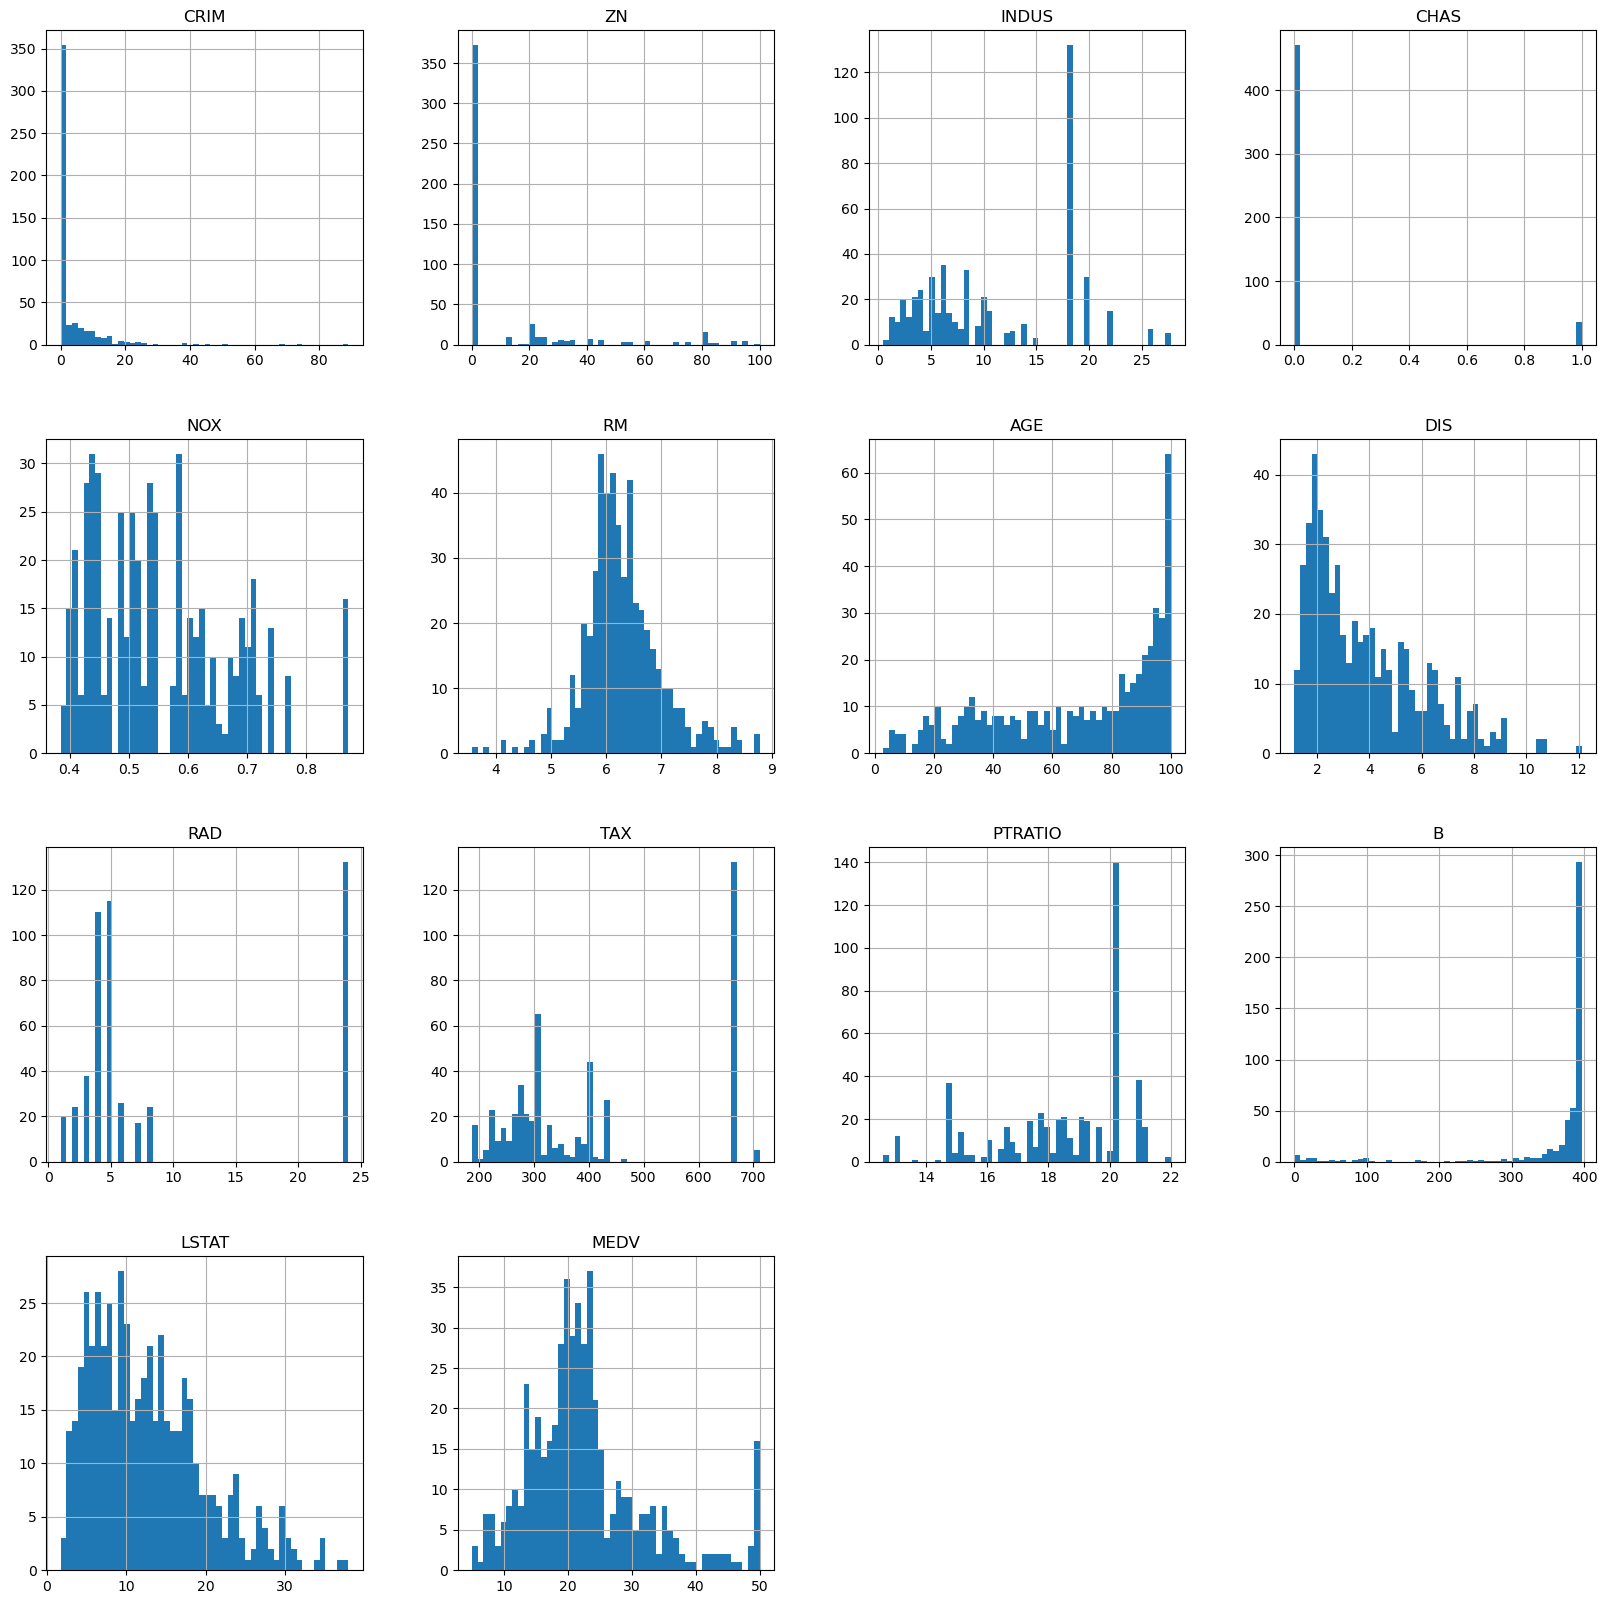

In [197]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50,figsize=(20,20))

## Train Test Splitting

In [198]:
# This is for learning how the function works internally
# import numpy as np

# def split_train_test(data,test_ratio):
#     np.random.seed(42) #

#     shuffled=np.random.permutation(len(data))
#     test_set_size=int(len(data)* test_ratio)
#     test_indices=shuffled[:test_set_size]
#     train_indices=shuffled[test_set_size:]
#     return data.iloc[test_indices], data.iloc[train_indices]

In [199]:
# test_set,train_set=split_train_test(housing,0.2)

# print(f"Rows in training set: {len(train_set)}\n Rows in test set: {len(test_set)}")

In [200]:
from sklearn.model_selection import  train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

print(f"Rows in training set: {len(train_set)}\n Rows in test set: {len(test_set)}")

Rows in training set: 404
 Rows in test set: 102


In [201]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [202]:
housing=strat_train_set.copy() # made housing the training set

## Looking for correlations

In [203]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False) # calculating the correlation of money wrt all other features

# pearson correlation coeff 1 means strong positive correlation 
# when this value increases the price of the property will increase

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

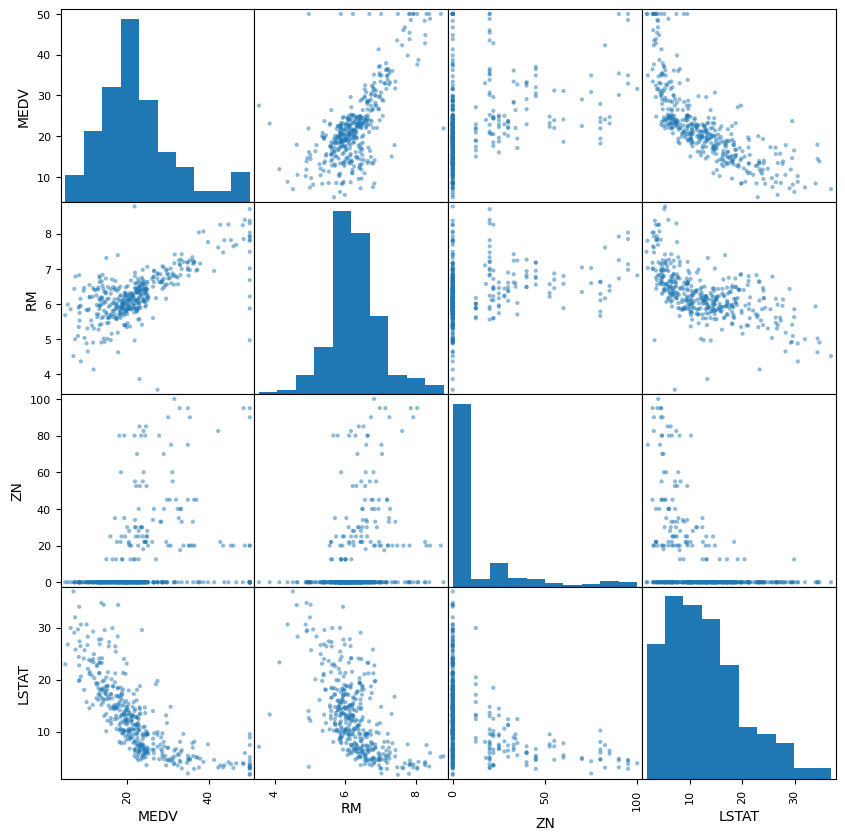

In [204]:
from pandas.plotting import scatter_matrix
attributes=['MEDV','RM','ZN','LSTAT']

scatter_matrix(housing[attributes],figsize=(10,10))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

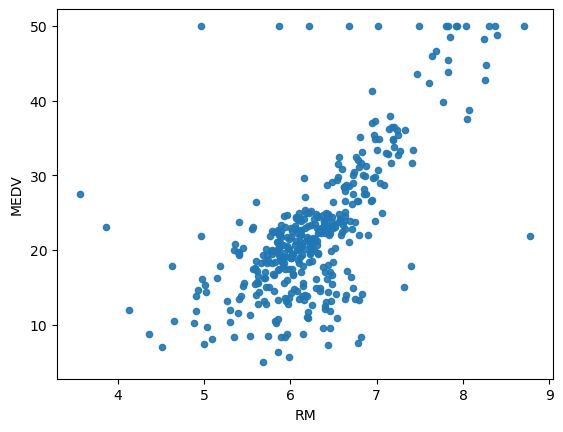

In [205]:
housing.plot(kind='scatter', x='RM', y='MEDV', alpha=0.9)

## Trying out attribute combinations

In [206]:
housing['TAXRM']=housing['TAX']/housing['RM']
# housing['TAXRM']

corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528626
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

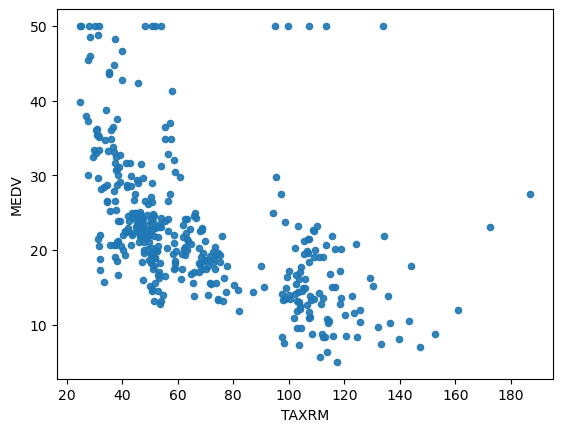

In [207]:
housing.plot(kind='scatter', x='TAXRM', y='MEDV', alpha=0.9)

In [208]:
housing=strat_train_set.drop("MEDV", axis=1)
housing_lables= strat_train_set["MEDV"].copy()

## Handling Missing Attributes

There are 3 ways to handle missing attributes
1. Get rid of the missing data points # newHousing = housing.dropna(subset["RM"])
2. Get rid of the whole attribute # housing.drop("RM",axis=1).shape
3. Set them to some value (0,mean or median)  # housing["RM"].fillna(housing["RM"].median())

In [209]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [210]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [211]:
X=imputer.transform(housing)
housing_corrected=pd.DataFrame(X,columns=housing.columns)
housing_corrected.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarily this has three types of objects
1. Estimators (imputer)
 - this has fit method (fits the data in the dataset and calculates internal parameters) & transform method.
2. Transformers (takes input and returns output based on the learnings of the fit() this has a funtion fit_transform() )
3. Predictors (LinearRegression model is an example of predictor)


## Creating Pipeline

In [212]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [213]:
housing_pipe_corrected=my_pipeline.fit_transform(housing)
# housing_pipe_corrected

## Selecting a desired model for the prediction

In [214]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#model=LinearRegression()
model=DecisionTreeRegressor()
model.fit(housing_pipe_corrected,housing_lables)

DecisionTreeRegressor()

## Evaluating the model

In [215]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions=model.predict(housing_pipe_corrected)

lin_rmse= np.sqrt(mean_squared_error(housing_lables, housing_predictions))
lin_rmse

0.0

## Cross Validation

In [216]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model,housing_pipe_corrected, housing_lables,scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)
rmse_scores

array([3.79280448, 5.32795206, 5.34374492, 3.85815576, 4.13536576,
       3.23160177, 5.13059451, 3.81958767, 3.27299557, 3.64605952])

In [217]:
def print_scores(scores):
    print("Scores: ",scores)
    print("Mean: ",scores.mean())
    print("Std Deviation: ",scores.std())

In [218]:
print_scores(rmse_scores)

Scores:  [3.79280448 5.32795206 5.34374492 3.85815576 4.13536576 3.23160177
 5.13059451 3.81958767 3.27299557 3.64605952]
Mean:  4.155886202427988
Std Deviation:  0.7721731255899205


In [219]:
from joblib import dump, load
dump(model,'predictor.joblib')

['predictor.joblib']

## Testing the model

In [220]:
X_test= strat_test_set.drop("MEDV",axis=1)
Y_test=strat_test_set["MEDV"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_prediction=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_prediction)
final_rmse=np.sqrt(final_mse)

final_rmse 

4.239554638097234